# Derek Nguyen 44096504
# CS 178 HW 5


## -----------------------------------
## Problem 1: Clustering

In [129]:
# Import all required libraries
from __future__ import division # For python 2.*

import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import scipy.linalg
import sys

np.random.seed(0)
%matplotlib inline

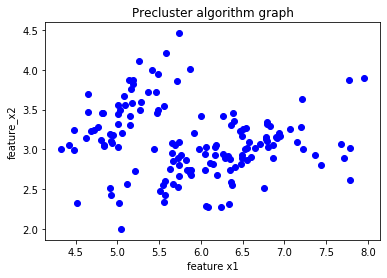

In [130]:
#1.1: Setup
iris = np.genfromtxt('data/iris.txt', delimiter=None)

X, Y = iris[:,0:2], iris[:,-1]

plt.scatter(X[:,0],X[:,1],color='b')
plt.xlabel('feature x1')
plt.ylabel('feature_x2')
plt.title('Precluster algorithm graph')
plt.show()

#### 1.1: I believe 3 clusters exist in the data.

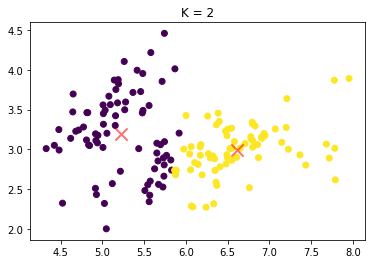

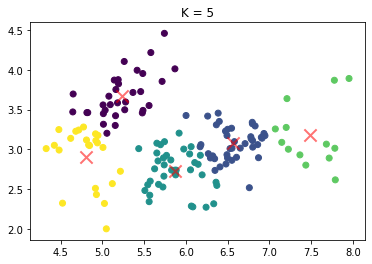

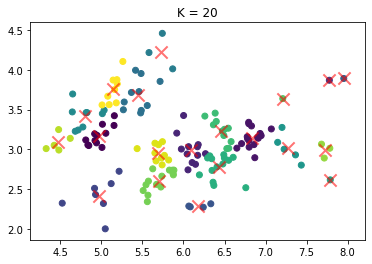

In [131]:
#1.2
K = [2,5,20]
for k in K:
    z,mu,sumd = ml.cluster.kmeans(X,k,init='k++', max_iter=5)
    fig, ax = plt.subplots(1, 1)
    ax.scatter(X[:, 0], X[:, 1], c=z)
    ax.scatter(mu[:, 0], mu[:, 1], s=150, marker='x', facecolor='red', lw=2, alpha=0.55)
    plt.title("K = "+ str(k))
    plt.show()

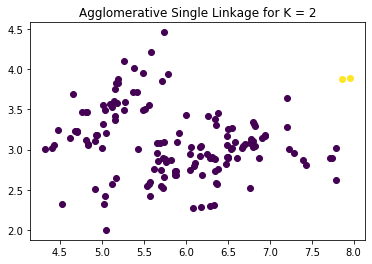

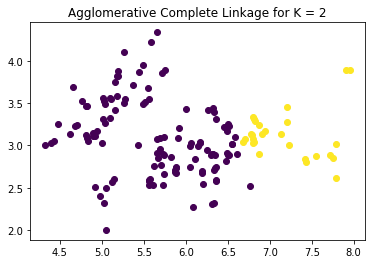

----------------------------------------------


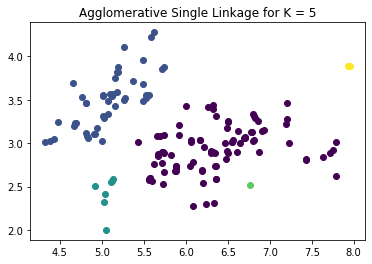

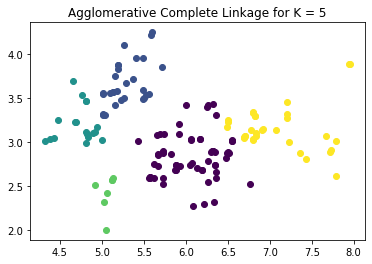

----------------------------------------------


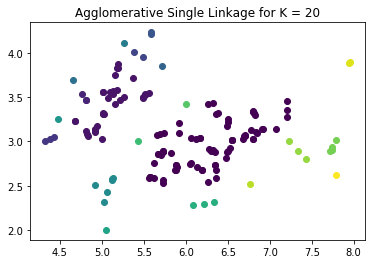

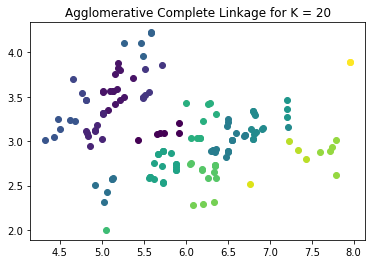

In [132]:
#1.3
z, c = ml.cluster.agglomerative(X, 2, method='min')
plt.title("Agglomerative Single Linkage for K = 2");
ml.plotClassify2D(None, X, z);
plt.show()

z, c = ml.cluster.agglomerative(X, 2, method='max')
plt.title("Agglomerative Complete Linkage for K = 2");
ml.plotClassify2D(None, X, z);
plt.show()
print("----------------------------------------------")
z, c = ml.cluster.agglomerative(X, 5, method='min')
plt.title("Agglomerative Single Linkage for K = 5");
ml.plotClassify2D(None, X, z);
plt.show()

z, c = ml.cluster.agglomerative(X, 5, method='max')
plt.title("Agglomerative Complete Linkage for K = 5");
ml.plotClassify2D(None, X, z);
plt.show()
print("----------------------------------------------")
z, c = ml.cluster.agglomerative(X, 20, method='min')
plt.title("Agglomerative Single Linkage for K = 20");
ml.plotClassify2D(None, X, z);
plt.show()

z, c = ml.cluster.agglomerative(X, 20, method='max')
plt.title("Agglomerative Complete Linkage for K = 20");
ml.plotClassify2D(None, X, z);
plt.show()


### 1.4 
The difference between k-means and agglomerative clusters is that agglomerative clusters are uses tree-based diagrams and k-means uses center points. 

The similarities are that both algorithms will generate better results with smaller k-values w/ clusters remaining the same size.


## -----------------------------------
## Problem 2: EigenFaces

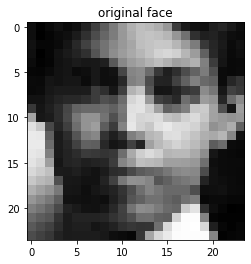

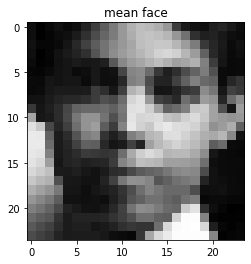

In [133]:
X = np.genfromtxt("data/faces.txt", delimiter=None)  # load face dataset
plt.figure()
# pick a data point i for display
img = np.reshape(X[5,:],(24,24))  # convert vectorized data to 24x24 image patches
plt.imshow( img.T , cmap="gray")  # display image patch; you may have to squint
plt.title("original face")
plt.show()


#2.1
mean = np.mean(X)
X0 = X-mean

img = np.reshape(X0[5,:],(24,24))  # convert vectorized data to 24x24 image patches
plt.imshow( img.T , cmap="gray")  # display image patch; you may have to squint

plt.title("mean face")
plt.show()

In [134]:
#2.2
U, S, V = scipy.linalg.svd(X0, full_matrices=False)
W = U.dot(np.diag(S))
print(np.shape(W))
print(np.shape(V))

(4916, 576)
(576, 576)


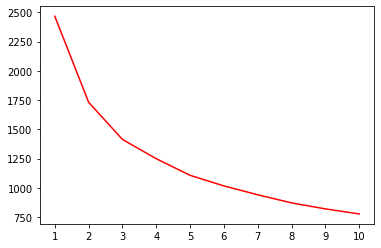

In [135]:
#2.3
mse = []
for k in range(1, 11):
    X0hat = W[:, :k].dot(V[:k,:])
    mse.append(np.mean((X0 - X0hat)**2))
# plot the data
_, axis = plt.subplots()
axis.plot(range(1,11), mse, c='red')
axis.set_xticks(range(1,11))
plt.show()


In [136]:
alpha = 2*np.median(np.abs(W[:,3])) #α
add = mean + alpha*V[3,:]   #μ+α V[j,:]
sub = mean - alpha*V[3,:]   #μ-α V[j,:]

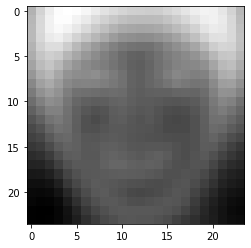

In [137]:
#2.4
img = np.reshape(add,(24,24))
plt.imshow(img.T, cmap="gray")
plt.show()

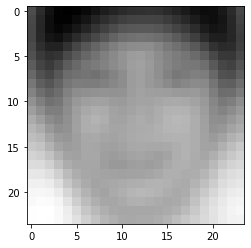

In [138]:
#2.4
img = np.reshape(sub,(24,24))
plt.imshow(img.T, cmap="gray")
plt.show()

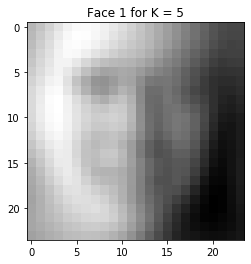

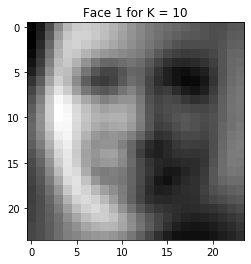

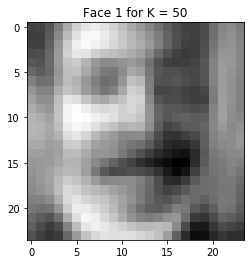

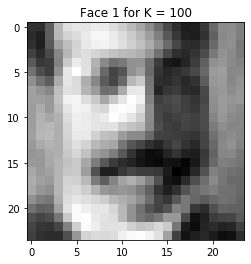

In [141]:
#2.5
K = [5,10,50,100]

for k in K:
    X0hat = W[:, :k].dot(V[:k,:])
    f1 = X0hat[1,:]
    img = np.reshape(f1,(24,24))
    plt.imshow(img.T, cmap="gray")
    plt.title("Face 1 for K = " + str(k))
    plt.show()

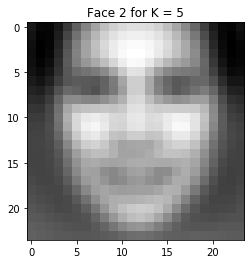

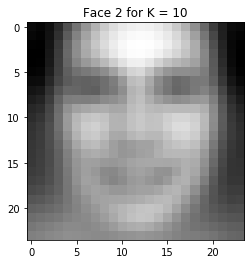

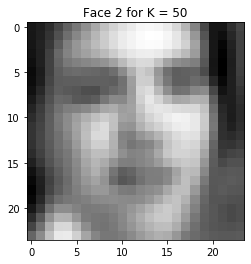

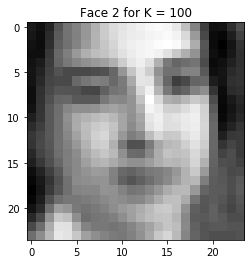

In [143]:
#2.5
for k in K:
    X0hat = W[:, :k].dot(V[:k,:])
    f2 = X0hat[2,:]
    img = np.reshape(f2, (24,24))
    plt.imshow(img.T, cmap="gray")
    plt.title("Face 2 for K = " + str(k))
    plt.show()

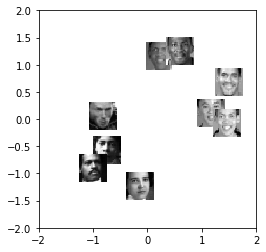

In [144]:
#2.6
idx = [2,4,6,8,10,12,14,16,18,20]
coord, params = ml.transforms.rescale(W[:, 0:2])
 # normalize scale of "W" locations
plt.figure()
for i in idx:
    loc = (coord[i,0], coord[i,0] + 0.5, coord[i,1], coord[i, 1] + 0.5) 
    # where to place the image & size
    img = np.reshape(X[i,:], (24,24))
    plt.imshow(img.T, cmap="gray", extent=loc) # draw each image
    plt.axis((-2,2,-2,2))
plt.show()


# Statement of Collaboration

This work is my own. Referenced discussion notes for scatter plots and eigenfaces and piazza for support.